In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Загружаем исходный датасет с помощью библиотеки Pandas

In [ ]:
df = pd.read_csv('/content/Датасет_банк.csv')
df.head(2)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0


#### Ознакомимся с некоторыми характеристиками датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Из инфо мы видим, что у нас по столбцу "Balance" имеются пропуски

In [ ]:
df.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

#### Предварительная подготовка данных
*    обработка заголовков
*    обработка пропущенных значений
*    обработка дубликатов
*    изменение типа данных

In [ ]:
#для удобства приведем заголовки к нижнему регистру
df.columns = df.columns.str.lower()
df.rename(columns={'userid': 'user_id',
                   'creditcard': 'credit_card'},
          inplace=True)
df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df.dtypes

user_id               int64
score                 int64
city                 object
gender               object
age                   int64
objects               int64
balance             float64
products              int64
credit_card           int64
loyalty               int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
#проверим и удалим дубликаты
df.duplicated().sum()
df.drop(columns = 'user_id').duplicated().sum()
df.head(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0


#### Исследовательский анализ данных

In [ ]:
#для поиска аномалий разделим датафрем на непрерывные и дискретные признаки
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
int_vars = ['score', 'age', 'balance', 'estimated_salary'] #интервальные (непрерывные)
cat_vars = ['city', 'gender', 'objects', 'products', \
            'credit_card', 'loyalty', 'churn' ] #категориальные (дискретные)

In [ ]:
# 2 линии нижнего и верхнего усов
#для подсчета значений нижнего и верхнего усов была предложена следующая функция
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [ ]:
actual_loval, actual_hival = calc_boxplot(df['age'])  #рассчитаем границы усов
actual_loval, actual_hival

(18, 62)

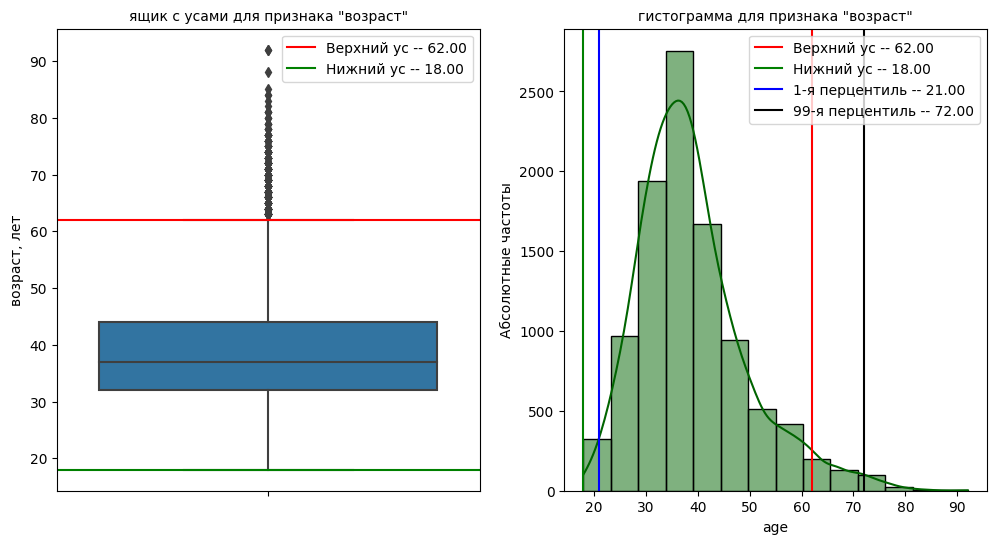

In [ ]:
#поиск аномальных значений на примере одного признака
plt.subplots(nrows = 1,
             ncols = 2,
            #  sharey = True,
             figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,
            y = 'age',
            # color = 'blue'
            )
actual_loval, actual_hival = calc_boxplot(df['age'])

plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
plt.title('ящик с усами для признака "возраст"', fontsize=10)
plt.ylabel('возраст, лет', fontsize=10)
plt.legend()
plt.subplot(1,2,2)
sns.histplot(data=df,
            x = 'age',
            color = 'darkgreen',
            bins = 14,
            kde = True)
plt.title('гистограмма для признака "возраст"', fontsize=10)
plt.ylabel('возраст, лет', fontsize=10)
plt.ylabel('Абсолютные частоты', fontsize=10)
plt.axvline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
plt.axvline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
per_1 = np.nanpercentile(df['age'], 1)
per_99 = np.nanpercentile(df['age'], 99)
plt.axvline(per_1,
            color='blue',
            label=f'1-я перцентиль -- {per_1:.2f}')
plt.axvline(per_99,
            color='black',
            label=f'99-я перцентиль -- {per_99:.2f}')
plt.legend()

In [ ]:
# применим формулу Стерженца для подсчета кол-ва бинов

from numpy.ma.core import log10
1 + 3.322*log10(df.shape[0])   #по формуле видим, что должно быть 14 бинов (столбиков)

14.288

In [ ]:
df.loc[df.age.between(18,62)]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dict_anomals = {'score' : 'скоринг',
                'age' : 'возвраст',
                'balance' : 'баланс',
                'estimated_salary': 'продукты'}   #создадим словарь для подписи

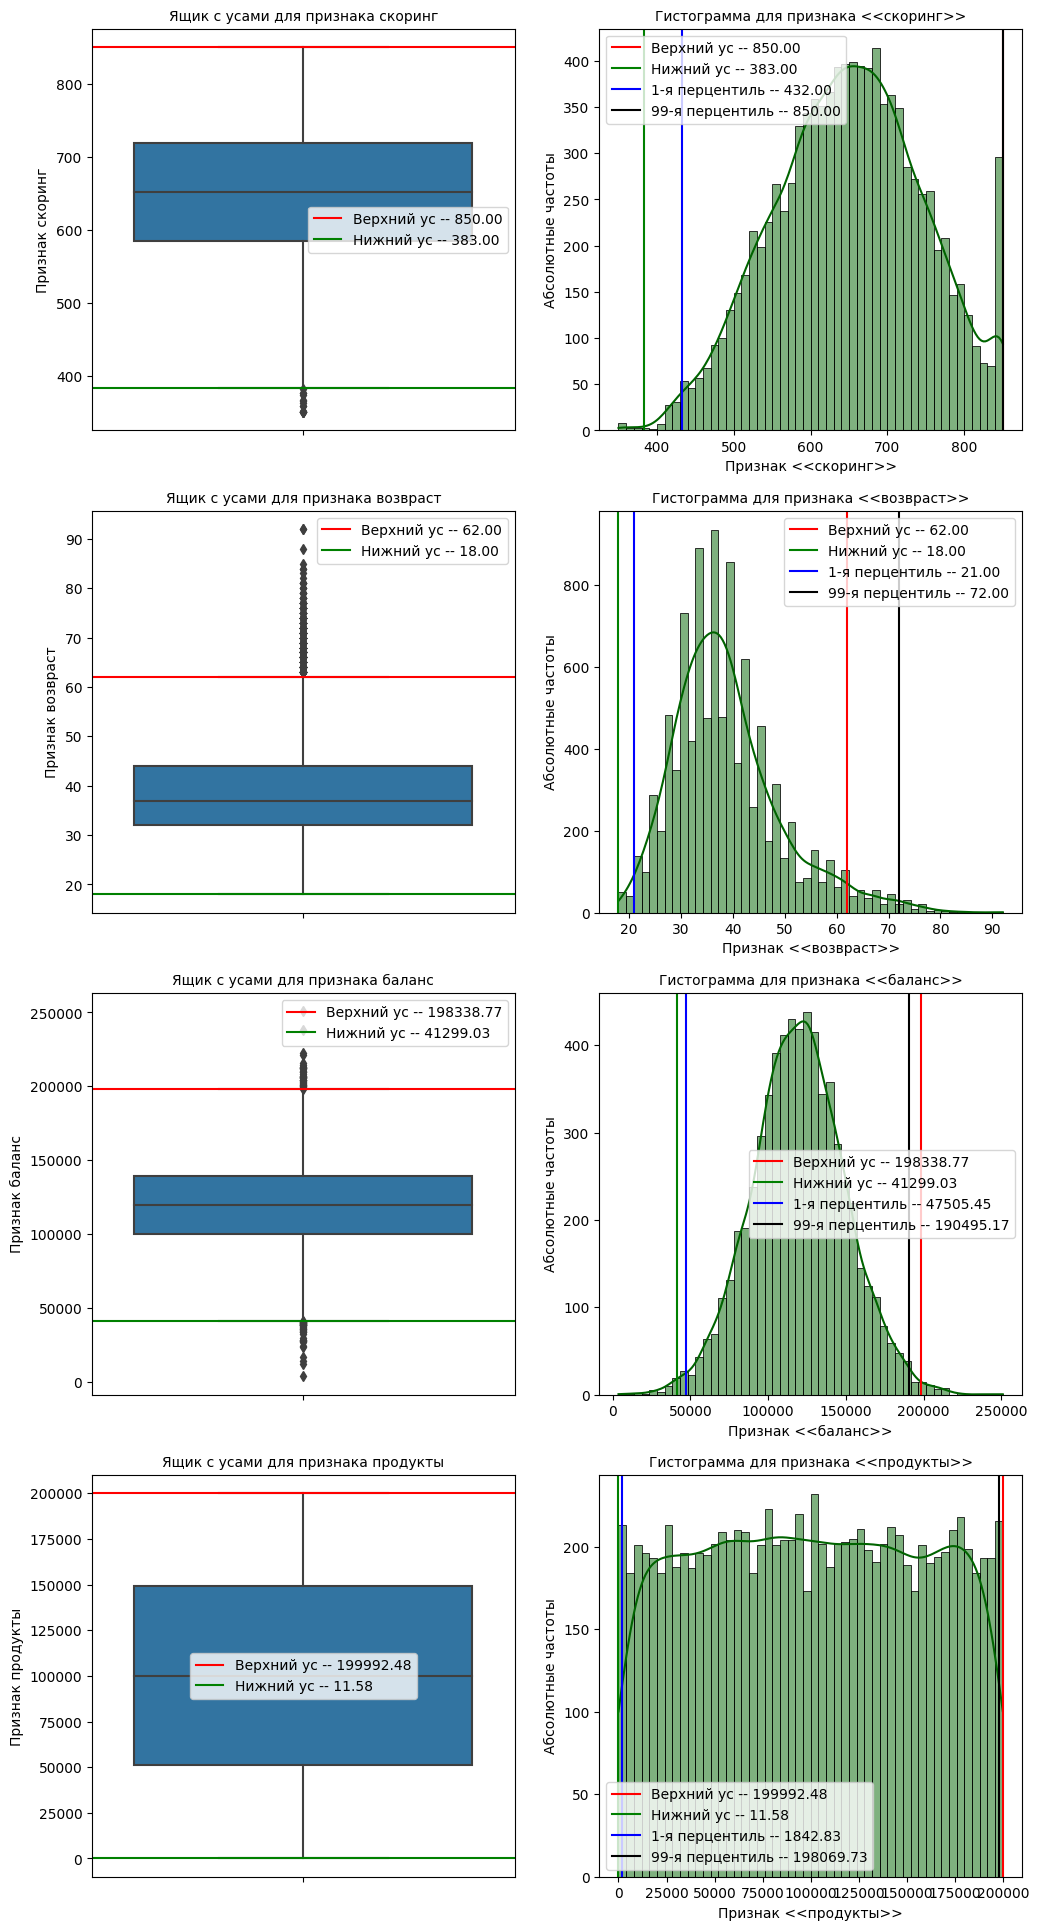

In [ ]:
# выведем сетку графиков с помощью функции
plt.subplots(nrows=4,
             ncols=2,
             #sharey=True,
             figsize=(12,24))
for index, col in enumerate(int_vars, start=0):
    plt.subplot(4,2,2*index+1)
    sns.boxplot(data=df,
            y=col,
            )
    actual_loval, actual_hival = calc_boxplot(df[col])
    plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
    plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
    plt.title(f"Ящик с усами для признака {dict_anomals.get(col)}", fontsize=10)
    plt.ylabel(f'Признак {dict_anomals.get(col)}', fontsize=10)
    plt.legend()

    plt.subplot(4,2,2*index+2)
    sns.histplot(data=df,
             x=col,
             color='darkgreen',
             bins=50,
             kde=True)
    plt.title(f'Гистограмма для признака <<{dict_anomals.get(col)}>>', fontsize=10)
    plt.xlabel(f'Признак <<{dict_anomals.get(col)}>>', fontsize=10)
    plt.ylabel('Абсолютные частоты', fontsize=10)
    plt.axvline(actual_hival,
                color='red',
                label=f'Верхний ус -- {actual_hival:.2f}')
    plt.axvline(actual_loval,
                color='green',
                label=f'Нижний ус -- {actual_loval:.2f}')
    per_1 = np.nanpercentile(df[col], 1)
    per_99 = np.nanpercentile(df[col], 99)
    plt.axvline(per_1,
                color='blue',
                label=f'1-я перцентиль -- {per_1:.2f}')
    plt.axvline(per_99,
                color='black',
                label=f'99-я перцентиль -- {per_99:.2f}')
    plt.legend()

In [ ]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
#фильтры на признаки
filtered_score = df.score.between(np.nanpercentile(df['score'], 1), 849)
filtered_age = df.age.between(calc_boxplot(df.age)[0],
                              calc_boxplot(df.age)[1])
filtered_balance = df.balance.between(calc_boxplot(df.balance)[0],
                                      calc_boxplot(df.balance)[1])    # фильтр на баланс с учетом границ усов
filtred_balance_null = df.balance.isna()                              # фильтр на пропуски по балансу
full_filtred_balance = filtered_balance | filtred_balance_null        # общий фильтр на признак
filtered_estimated_salary = df.estimated_salary.between(np.nanpercentile
 (df['estimated_salary'],1),np.nanpercentile(df['estimated_salary'],99))

In [ ]:
df[filtered_age].head(3)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
(1 - df.loc[full_filtred_balance
            ].shape[0] / df.shape[0])*100

0.7299999999999973

In [ ]:
#проверим % потерь от фильтрации данных
(1 - df.loc[filtered_score
            & filtered_age
            & full_filtred_balance
            & filtered_estimated_salary
            ].shape[0] / df.shape[0])*100

9.27

In [ ]:
#фильтруем датасет
df = df.loc[filtered_score
            & filtered_age
            & full_filtred_balance
            & filtered_estimated_salary]
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#поиск и обработка аномальных значений категориальных признаков
for col in cat_vars:
    print(f"Значения признака {col}")
    print(df[col].value_counts())
    print('-'*10)

Значения признака city
Ярославль         4549
Ростов Великий    2268
Рыбинск           2256
Name: city, dtype: int64
----------
Значения признака gender
М    4960
Ж    4113
Name: gender, dtype: int64
----------
Значения признака objects
7     944
2     943
1     937
5     927
8     924
3     906
4     905
9     893
6     879
10    446
0     369
Name: objects, dtype: int64
----------
Значения признака products
1    4587
2    4186
3     245
4      55
Name: products, dtype: int64
----------
Значения признака credit_card
1    6398
0    2675
Name: credit_card, dtype: int64
----------
Значения признака loyalty
1    4568
0    4505
Name: loyalty, dtype: int64
----------
Значения признака churn
0    7244
1    1829
Name: churn, dtype: int64
----------


In [ ]:
cat_vars

['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty', 'churn']

In [ ]:
dict_to_rus = {'score': 'балл',
               'age': 'возраст',
               'balance': 'баланс',
               'estimated_salary': 'зарплата',
               'city': 'город',
               'gender': 'пол',
               'objects': 'кол-во объектов',
               'products': 'кол-во -продуктов' ,
               'credit_card': 'наличие кредитной карты',
               'loyalty': 'лояльность',
               'churn': 'уход'
               }

<ipython-input-28-53ce3785edd4>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-28-53ce3785edd4>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-28-53ce3785edd4>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


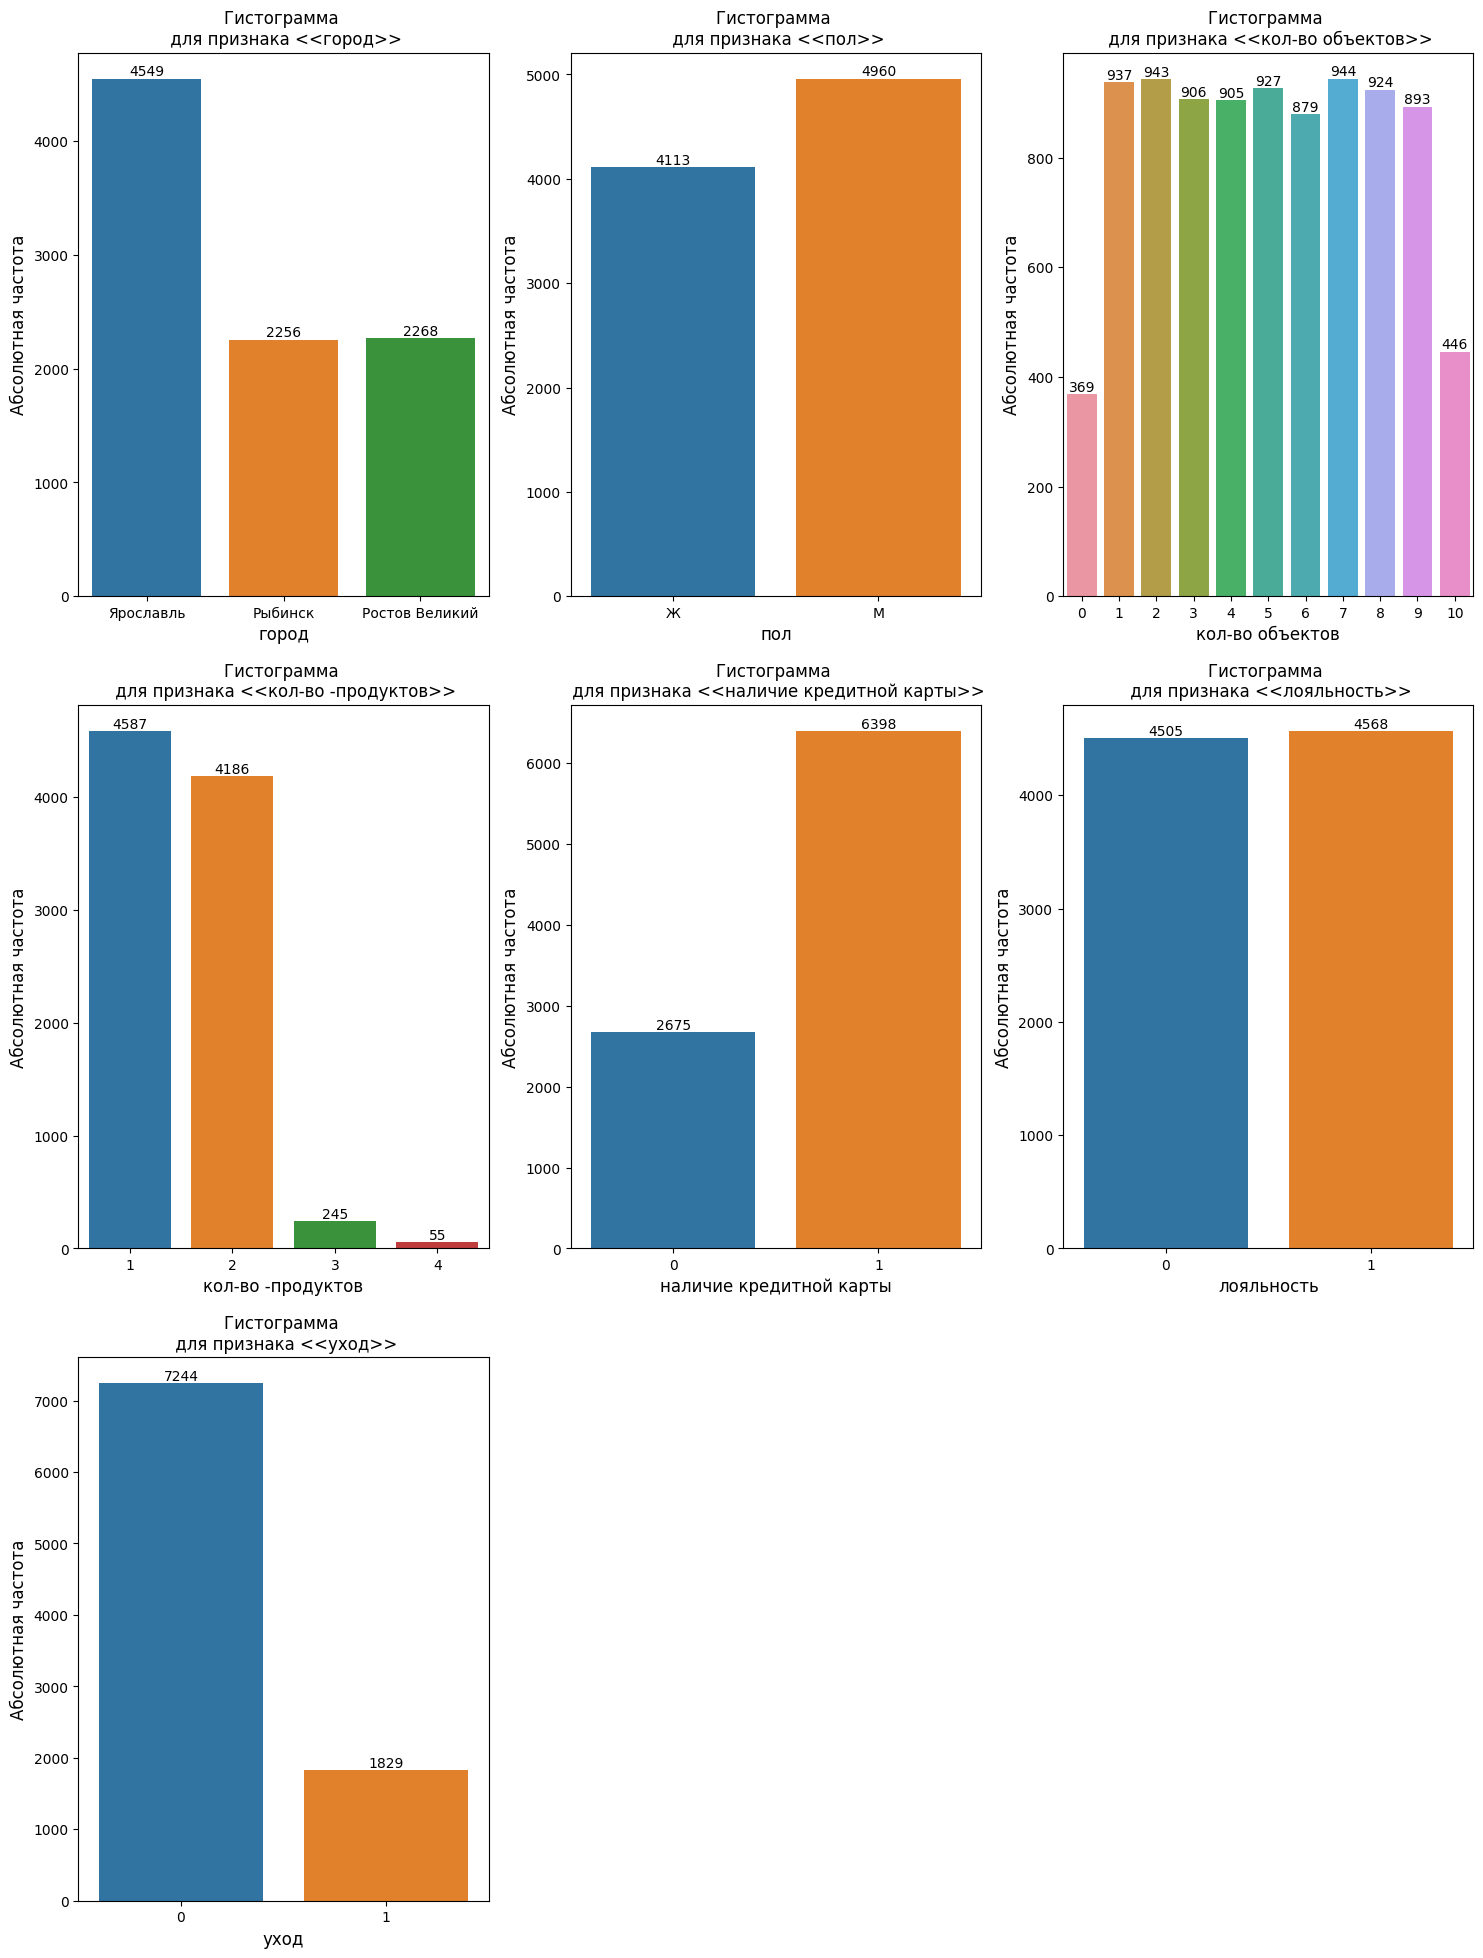

In [ ]:
#анализ аномалий категориальных признаков с помощью графиков

fig, axes = plt.subplots(3, sharey=True, figsize=(18,24))
i=0
for i, col in enumerate(cat_vars):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=col, data=df)
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Абсолютная частота', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate(#'{:d} ({:.1f}%)'.format(p.get_height(), 100.*y/df.shape[0]),
            '{:.0f}'.format(p.get_height()),
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

In [ ]:
df.isna().sum()   #пропуски есть - принято решение не обрабатывать

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3303
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Проведем исследовательский анализ данных с целью выявления:
- интервальных признаков в разрезе целевого признака: изучение точечных оценок; гистограммы и распределения;
- категориальных признаков в разрезе целевого признака: изучение точечных оценок; гистограммы.

In [ ]:
#считаем выборочные статистики для целевых групп (ушел/ остался)
df.groupby('churn')[int_vars].agg(['mean', 'median']).round(0)

score          age          balance           estimated_salary  \
        mean median  mean median      mean    median             mean   
churn                                                                   
0      648.0  651.0  36.0   36.0  119803.0  119994.0          99944.0   
1      647.0  646.0  44.0   44.0  120428.0  119646.0         101141.0   

                 
         median  
churn            
0       99954.0  
1      101383.0

Мы наблюдаем, что по всем признакам, кроме возраста, расхождения не существенны. Построим графики плотности распределения, чтобы получить визуальное подтверждение.

<ipython-input-31-09ac66e9483d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-31-09ac66e9483d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


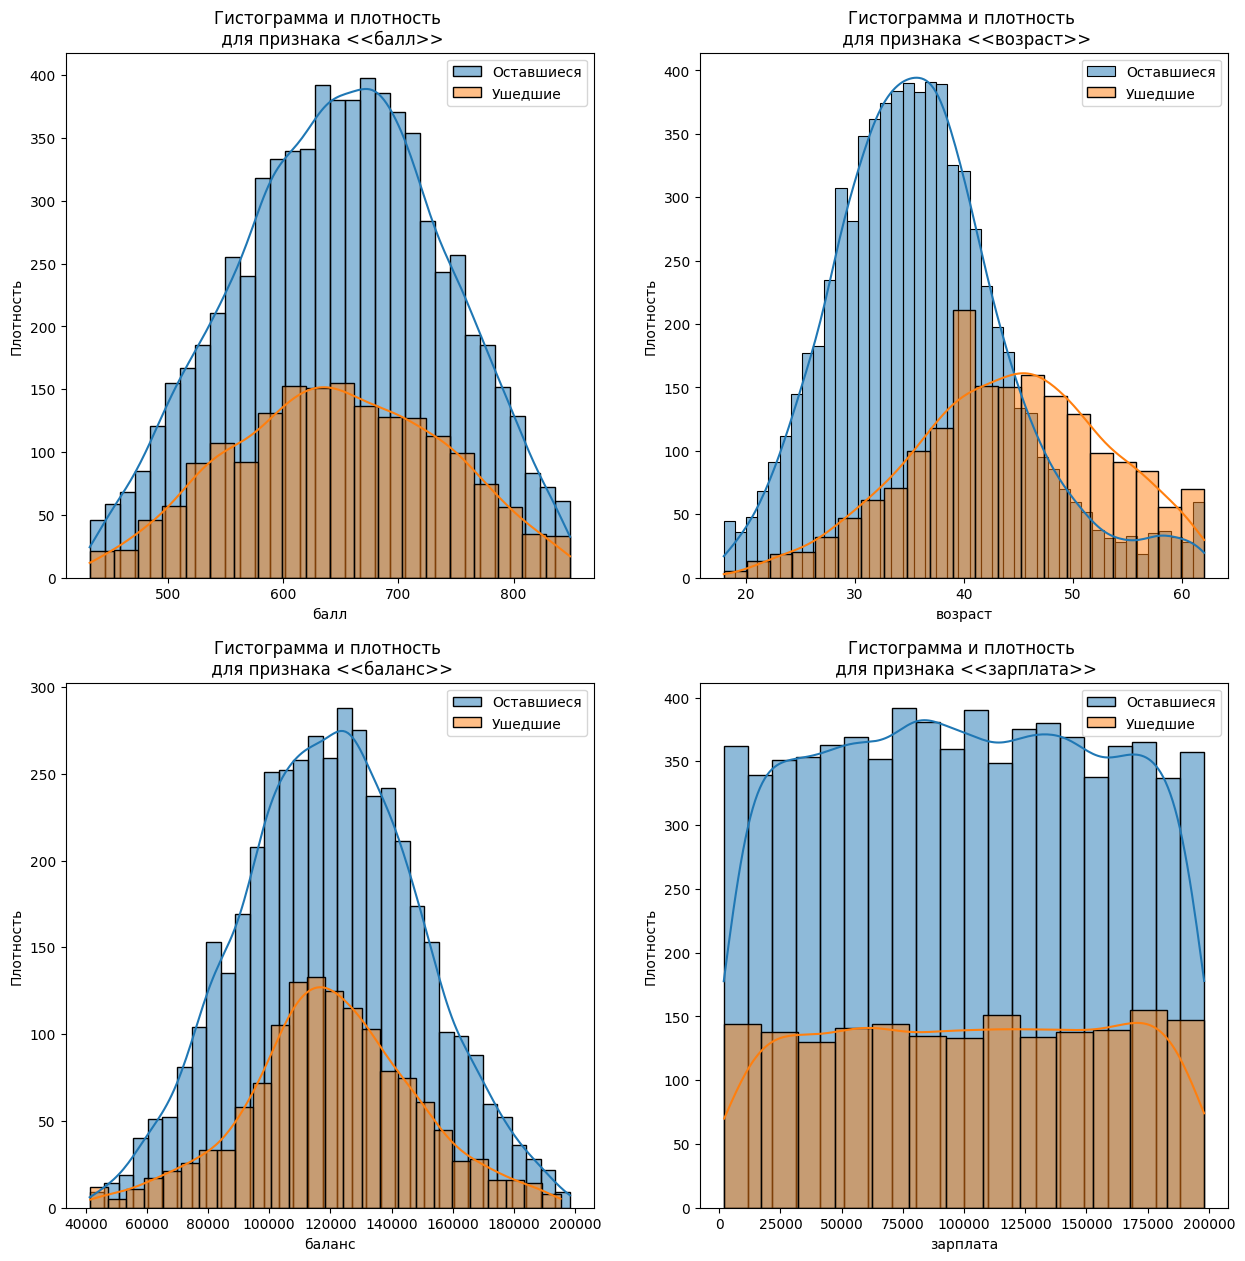

In [ ]:
# построим графики плотности распределения для целевых групп (ушел/ остался)
fig, axes = plt.subplots(2, figsize=(15,15))
i=0
for i, col in enumerate(int_vars):
    plt.subplot(2,2,i+1)
    ax = sns.histplot(df[df.churn == 0][col], label = 'Оставшиеся', kde=True)
    ax = sns.histplot(df[df.churn == 1][col], label = 'Ушедшие', kde=True)
    plt.title("Гистограмма и плотность \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col])
    plt.ylabel('Плотность')
    plt.legend()

#### Выводы:
Графический анализ в сочетании с точечными оценками, позволяет сделать вывод о том, что признак возраста влияет на такой целевой показатель как уход. А признак скорингового балла не влиет. С одинаковой вероятностью мы можем утверждать, что уйдут клиенты и с высокими балами и с низкими, никакой тенденции не наблюдается.

In [ ]:
#начинаем словарь для сбора аномальных значений по признакам
dict_anomals = {'age': [21,62]}

In [ ]:
cat_vars = ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty']

<ipython-input-34-336b0f66db94>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-34-336b0f66db94>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-34-336b0f66db94>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


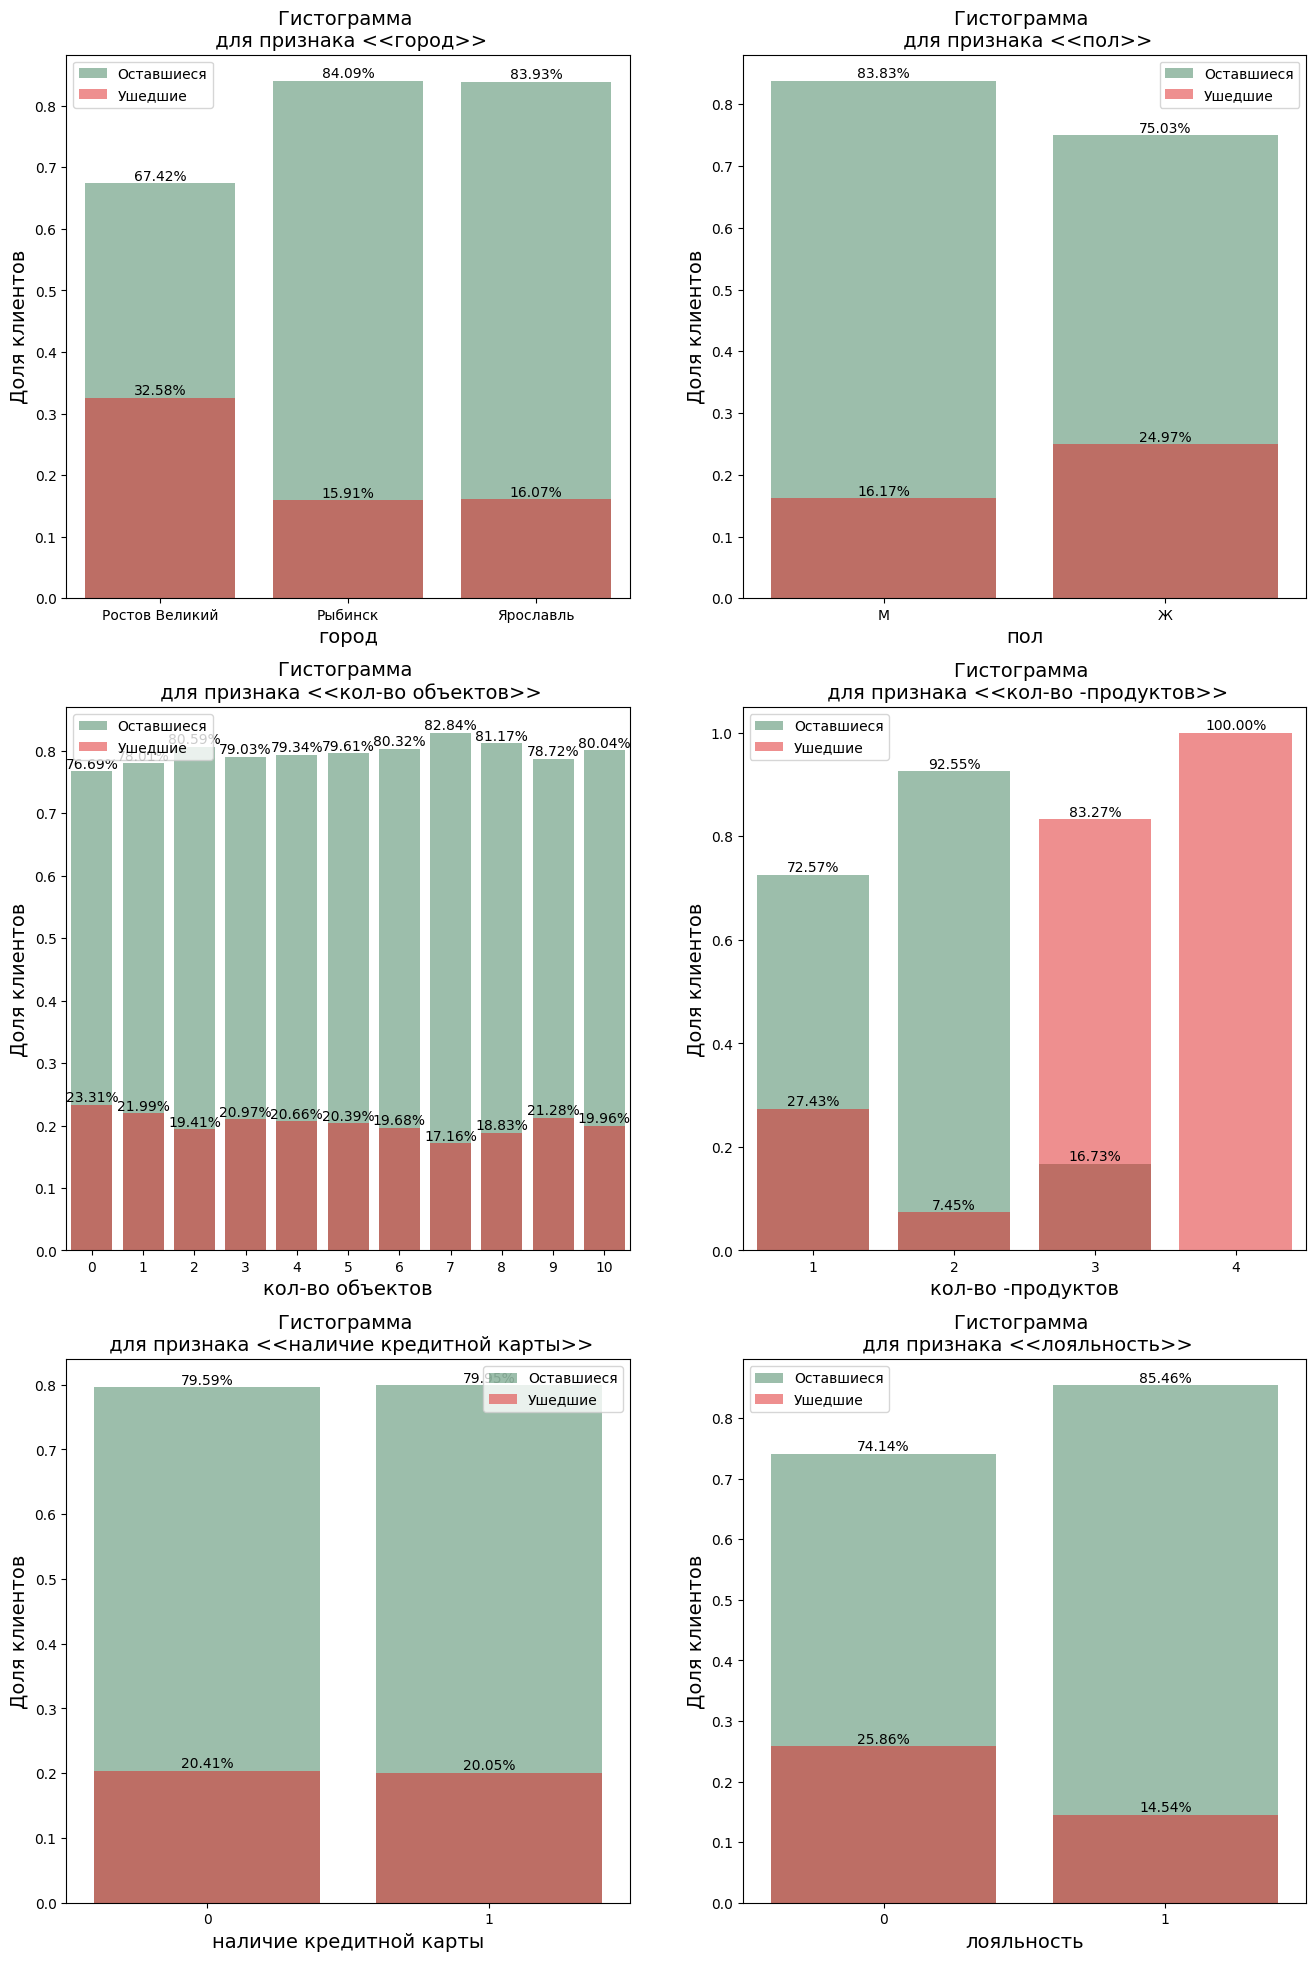

In [ ]:
cat_vars = ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty']
fig, axes = plt.subplots(3, figsize=(16,24))
i=0
for i, col in enumerate(cat_vars):
    plt.subplot(3,2,i+1)
    data_all = df[col].value_counts()
    r = (pd.DataFrame([df[df.churn == 0][col].value_counts()/data_all,
              df[df.churn == 1][col].value_counts()/data_all]).T)
    r.columns = ['0','1']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'Оставшиеся')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red',
                      alpha = 0.5, label = 'Ушедшие')
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]), fontsize = 14)
    plt.xlabel(dict_to_rus[col], fontsize = 14)
    plt.ylabel('Доля клиентов', fontsize = 14)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y),
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

In [ ]:
df[(df.city == 'Ростов Великий') & (df.churn == 1)].shape[0] / df[df.city == 'Ростов Великий'].shape[0] * 100

32.58377425044092

#### Формулировка и проверка гипотез

На графике гистограммы плотности распределения мы видим, что по признаку 'возвраст' идет смешение оси, разумно будет предположить, что именно по данному признаку будет статически значимая разница

##### Сформулируем Гипотезы в разрезе признака 'возраст':
1.   H_0: Возраст клиентов, склонных к уходу, не отличается от возраста клиентов, склонных остаться
2.   H_1: Возраст клиентов, склонных к уходу, отличается от возвраста клиентов, склонных остаться


Имеем две выборки: X -

*   X - клиенты, склонные уйти
*   У - клиенты, склонные остаться



1.  Проверяем гипотезу о нормальном распределении выборок  X и Y (критерий Шапиро-Уилка и критерий Колмогорова-Смирнова);
2.  Задаем уровень значимости - $\alpha = 0,05$. Далее проверяем гипотезы для параметров: если закон нормальный у x и y, то проверяются гипотезы в отношении средних значений с помощью t-критерия Стьюдента; если гипотеза о нормальности не
подтвердилась, хотя бы для одной выборки, то проверяют гипотезы либо по средним, либо по медианам с помощью критерия U-критерия Манна — Уитни или Краскела-Уоллиса.

3. Сравниваем полученное из методов значение $p_\text{value}$ с $\alpha$. Если $p_\text{value} < α $, то гипотезу H_0 отвергают на уровне значимости $\alpha = 0.05$

In [ ]:
# подключение методов для проверки гипотез о виде закона распределения,

from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import jarque_bera
from scipy.stats import mannwhitneyu

In [ ]:
# формируем две выборки
X = df[df.churn == 1].age #-- выборка из ушедших клиентов
Y = df[df.churn == 0].age #-- выборка из оставшихся клиентов

In [ ]:
# проверка на нормальность с помощью критерия Шапиро-Уилка

# H_0: выборка X подчиняется нормальному закону
# H_0: выборка Y подчиняется нормальному закону

shapiro(X)

ShapiroResult(statistic=0.9901224374771118, pvalue=8.045960009361863e-10)

In [ ]:
shapiro(Y)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9745792150497437, pvalue=5.360821783115887e-34)

Так как $p_\text{value} < α $, то гипотезу H_0 о нормальности распределений отвергаем. Но стоит отметить, что критерий Шапиро нормально работает при количестве записей менее 5000. Применим критерий Колмогорова-Смирнова

In [ ]:
#проверка на нормальность с помощью критерия Колмогорова-Смирнова

print(
    kstest(df[df.churn == 1].age, 'norm',
       args=(df[df.churn == 1].age.mean(), df[df.churn == 1].age.std()))
    )

#     X vs F(x)


print(
    kstest(df[df.churn == 0].age, 'norm',
           args=(df[df.churn == 0].age.mean(), df[df.churn == 0].age.std()))
)

#проверяется гипотеза H_0 о том, что выборки X и Y подчинаяются одному закону распределения
print(ks_2samp(X,Y))
#проверка по критерию КС дала те же результаты

KstestResult(statistic=0.03837102639178447, pvalue=0.00892091866181598, statistic_location=45, statistic_sign=-1)
KstestResult(statistic=0.06741877297420862, pvalue=4.5099123176107333e-29, statistic_location=38, statistic_sign=1)
KstestResult(statistic=0.40163417231250975, pvalue=8.763546251490338e-212, statistic_location=41, statistic_sign=-1)


In [ ]:
anderson(df[df.churn == 0].age)

AndersonResult(statistic=38.91417179036125, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=36.20472114853672, scale=8.05744766447557)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
# В связи с тем, что распределения X и Y не подчиняются нормальному закону,
# используем тест Манна-Уитни:
mannwhitneyu(X,Y)


MannwhitneyuResult(statistic=9948378.0, pvalue=4.232647523584524e-242)

на выходе имеем pvalue=4.232647523584524e-242 < $\alpha$ = 0.05, гипотезу H_0 о равенстве средних отвергаем, из чего следует, что по критерию возраст между ушедшими и оставшимися имеются отличия, иными словами показатель возвраста влияет на уход клиента.

MannwhitneyuResult(statistic=9948378.0, pvalue=4.232647523584524e-242)

### Корреляции

<ipython-input-42-905b27e47d09>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_id.corr(), annot = True)


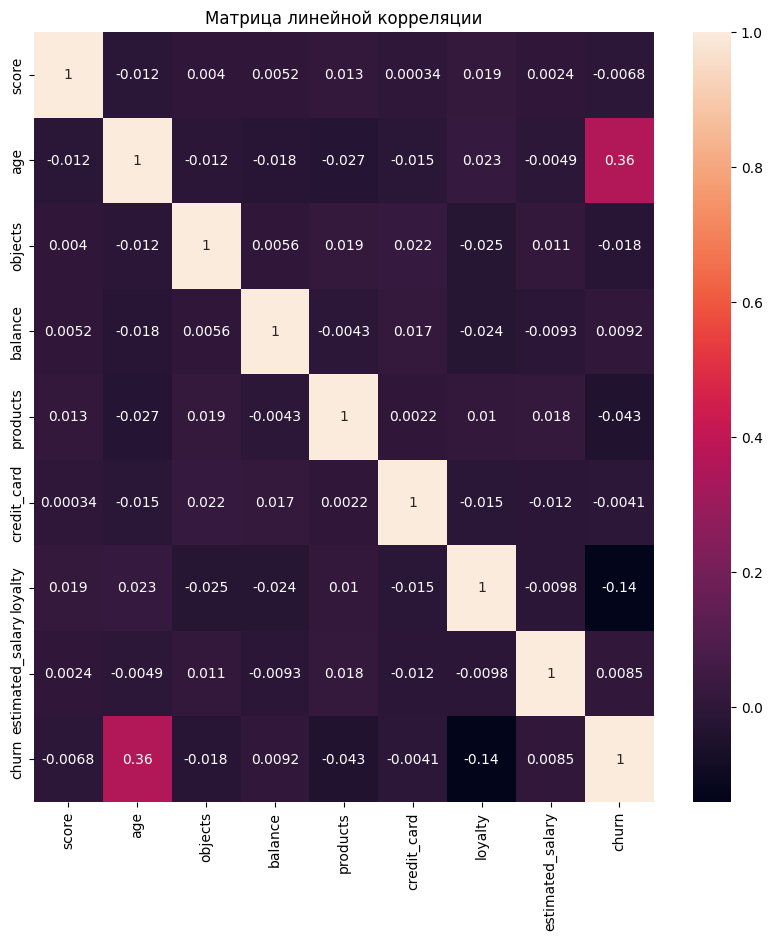

In [ ]:
df_no_id = df.drop('user_id', axis = 1)
plt.figure(figsize=(10,10))
sns.heatmap(df_no_id.corr(), annot = True)
plt.title ('Матрица линейной корреляции')
plt.show()

Все абсолютные значения коэффициентов попарной корреляции, кроме такой пары признаков, как уход и возвраст, не превышают 0,3. Это свидетельствует о слабой линейной корреляции между признаками. Можно отметить некоторую линейную корреляцию между такими признаками как уход и возраст.